# Lab 2.8: Tree Based Methods

In this case, we will be conduct a simpler exercise with decision trees using previous implementations. In particular, we will make use of several implemented methods in ML libraries s.a. `sklearn` (_that should be good news for you, doesn't it?_). With this, we will try to explore the main characteristics of decision trees, that you will also have to explore in the more theoretical part of the lab (the other exercise, the one on the pdf).

We will begin, as usual, importing the relevant libraries:

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus

from sklearn.metrics import mean_squared_error

from math import sqrt

In [125]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"


We will first apply this to a regression dataset so that you see the way the model is constructed for this case 

## Regression Tree

For starters, let us try out a regression tree. To that end, first load the `Hitters.csv` dataset from the `data` 
folder.

In [126]:
# TODO (make sure you remove the None values!)
hitters  = pd.read_csv("../data/Hitters.csv").dropna()

# Print the columns here to check their names
print(hitters.columns)

Index(['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


For this first case, we will only use the variables `Years` and `Hits` for the tree. Our target variable will be `Salary`. Separate them into `X` and `y`

In [127]:
# Separate the independent variables (X) from the dependent one (y - salary)
 
X = hitters[["Years", "Hits"]]
y = hitters["Salary"]

Construct a _decision tree regressor_ using the `sklearn` function and fit it. To do that, check out the `DecisionTreeRegressor` in sklearn and implement it here.

For reproducibility, fix the `random_state` to `0` and the `max_leaf_nodes` to `3` (make sure you know what this last thing does!)

In [128]:
# Construct the regressor
regressor = DecisionTreeRegressor(random_state=0, max_leaf_nodes=3) 
#random state da una semilla aleatoria para  que los resultados sean reproducibles.
#max leaf imita el número máximo de hojas => puede ser util para sobreajuste
# Fit it with the .fit method
regressor.fit(X, y)  # TODO

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

Now we will employ some functions engrained in `StringIO` alongside the method `export_graphviz` from the `tree` object in sklearn. This will enable us to visualize the constructed tree.

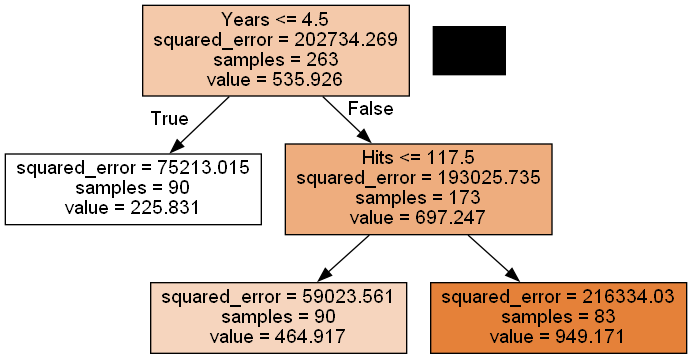

In [129]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data, 
                feature_names=['Years', 'Hits'], 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

> Question: Describe the previous tree. What do you see? Do you think this will work well? Respond **briefly**

Este es un árbol de tan solo 2 cortes (tal como lo hemos prohramado con  nuetsro regressor = DecisionTreeRegressor) el cual primero hace el primer corte por la variable Years, y después hace el segundo corte por la variable Hits. (Además incluye el error, el número de samples y el valor(valor promedio de la variable objetivo en ese nodo) ) 

Este árbol tiene la ventaja de que es simple y fácil de interpretar pero al tener solo 2 cortes puede no ser muy preciso y tener sesgo muy alto (underfitting), puede no tener en cuenta otras relaciones complejas. 

Now we will plot the decision regions using the information on the cuts. Add lines wherever needed so that you can see the decision boundaries for the regression tree above

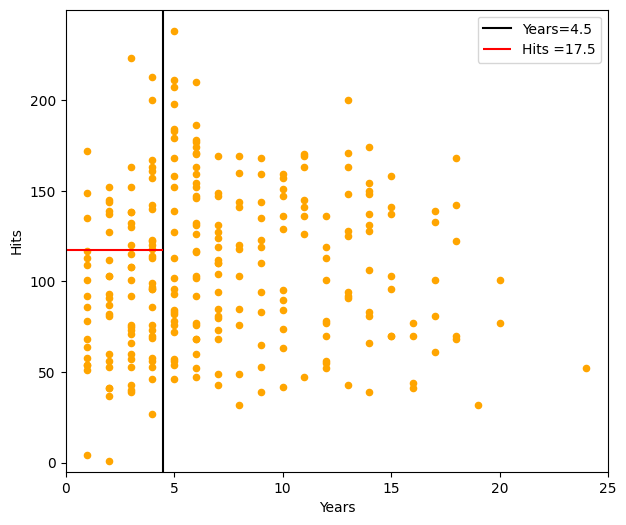

In [130]:
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)

# Add whatever you may need here to clearly plot the decision boundaries 
# TODO
plt.axvline(x=4.5, color='black', linestyle='-', label='Years=4.5')
plt.hlines(y=117.5, xmin=0, xmax=4.5, color='red', linestyle='-', label='Hits =17.5')

plt.legend()
plt.show()

## Tree Size

Now, for the previous part we limited the growth of the tree so that we recovered a simple (but easily interpretable) tree. Now we will go all-out: we will construct a more exhaustive tree using different variables. For this particular case, let us use **all variables except** `League`, `Division`, `NewLeague` and `Salary` as independent variables to predict, precisely, the `Salary` value. 

In [131]:
# Construct the input variable dataset
X = hitters
X = X.drop(columns=['Salary','Player','League','Division','NewLeague'])
y = hitters['Salary']
# Print the column names to check
print(X.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


We will now perform the train/test split, but we will do it so that the proportion of train and test examples is $50\%$ (that is, train and test consist on $50\%$ of the datapoints).

In [132]:
# Perform the train-test split here. Do it so that the  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0) # TODO: Fill the NAs, fixing also the random_state to 0 for reproducibility

Now, train the tree to its fullest extent: put no limits on the growth and see what happens. You can re-use some of the previous `graphviz` code to visualize the tree here. Plot the complete tree.

In [ ]:
#Train the tree without limits to its growth (random_state = 0)
unlimited_tree_regressor = DecisionTreeRegressor(random_state=0)
unlimited_tree_regressor.fit(x_train, y_train) # TODO

DecisionTreeRegressor(random_state=0)

Reuse the code you need to plot the tree here

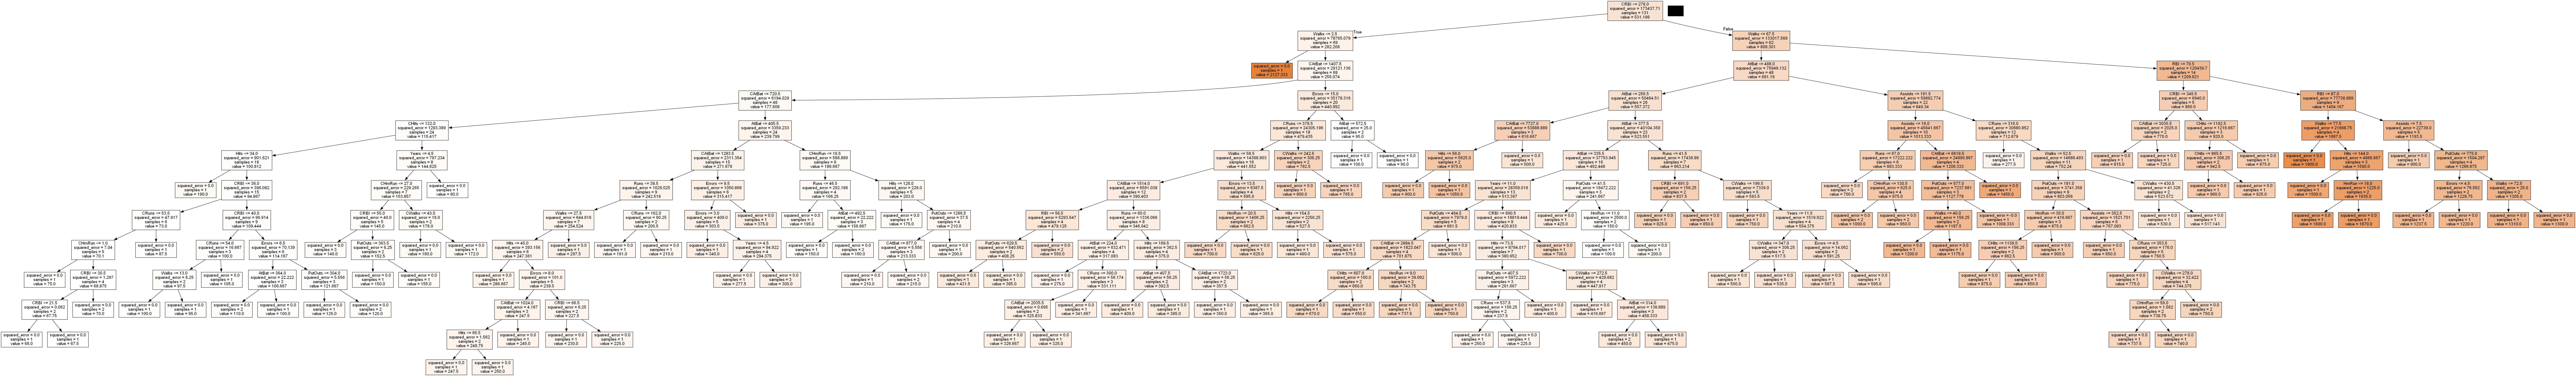

In [134]:
# TODO: Your code here!
dot_data = StringIO()
export_graphviz(unlimited_tree_regressor, 
                out_file=dot_data, 
                feature_names=x_train.columns, 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


> Question: What do you see? What can you say about this tree? Does it have any important properties?

El árbol es muy complejo pudiendo tener hojas totalmente puras en alguna de las muchas ramas que tiene, resultando en overfitting 

Maybe we went _a bit too far_ with the tree... Let's set up some limitations to see everything better. Try setting the `max_features` to 9, and the `max_depth` to 4. (_It is important you understand what these parameters do! Check out the documentation in the [library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)_)

In [135]:
regressor_2 = DecisionTreeRegressor(random_state=0, max_features=9, max_depth=4) # TODO (random_state = 0)
regressor_2.fit(x_train, y_train) # TODO
 

DecisionTreeRegressor(max_depth=4, max_features=9, random_state=0)

Reuse the code you may need to plot the tree here

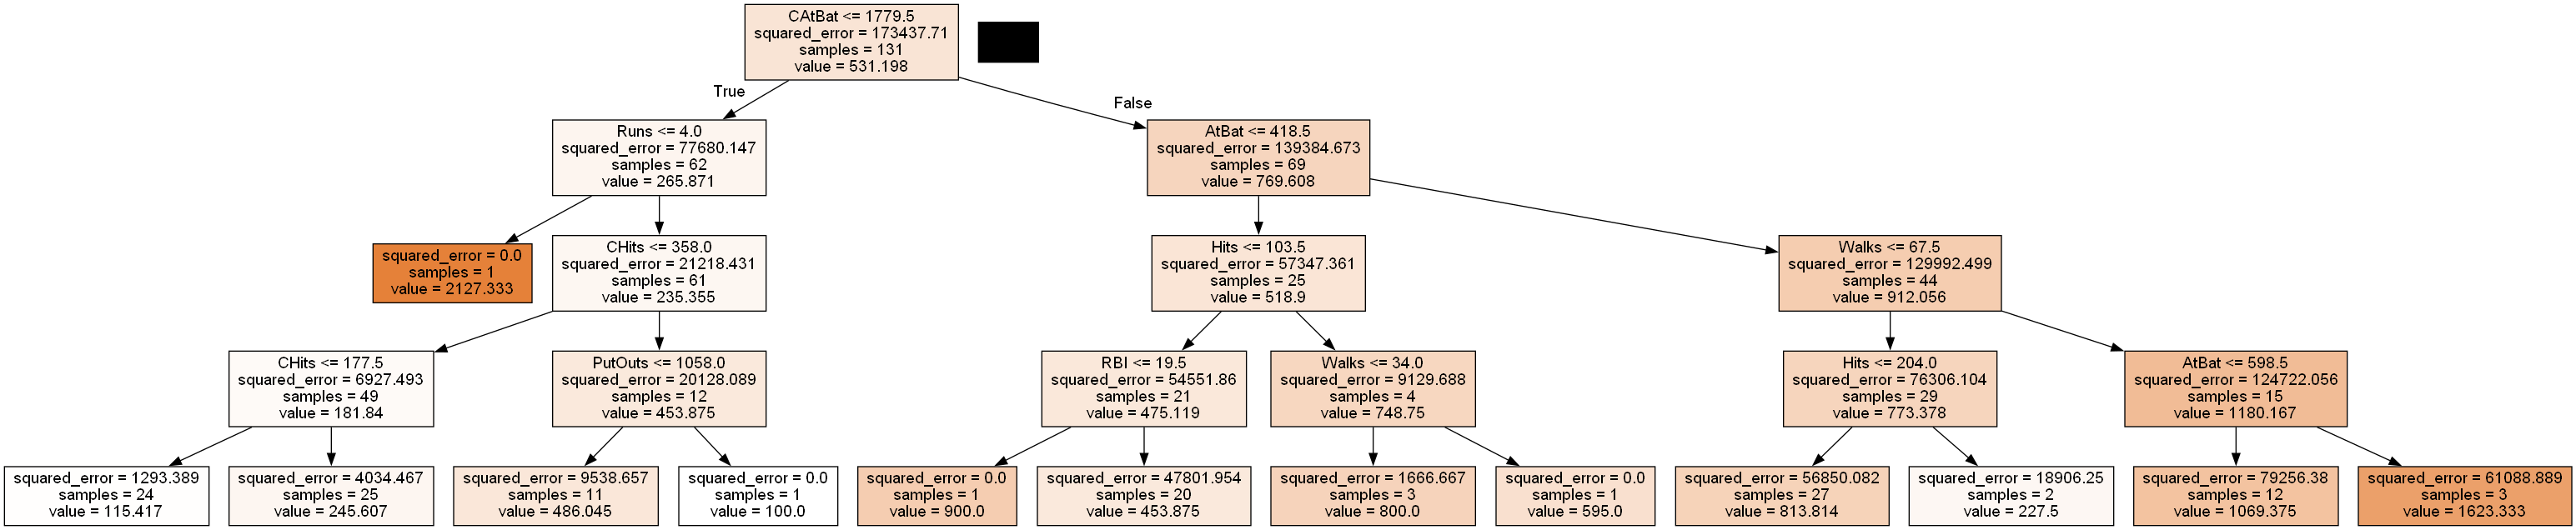

In [136]:
# TODO: Your code here!
dot_data = StringIO()
export_graphviz(regressor_2, 
                out_file=dot_data, 
                feature_names=x_train.columns, 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us see if this tree works well at all... Since we are performing regression, we can obtain the RMSE (we use the Root MSE since it shares the same dimensions of the outputs):

In [137]:
predictions = regressor_2.predict(x_test) # TODO: Obtain the predictions for x_test

# TODO: Print the RMSE for the predictions
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

369.8405919459622

Now, the question is: how do we know which tree depth to select here? As you may expect, the answer is, as almost always here, performing _cross validation_. In this particular instance we will not conduct exhaustive cross validation. Instead, we will do it in a very simple manner, obtaining *a single tree* for each depth value we want, fitting it to the data and seeing how well does it perform both in train and test  fitted to the data. To do this, do the following:
* Fit a **fixed max depth** (`i`) decision tree regressor using *all `x_train` variables*. Also, *fix the `random state` to 1* for reproducibility.
* Register its train and test RMSEs
* Plot the train and test RMSE curves for each `i` depth  

Make sure that you explore _enough_ depth values. 

Text(0, 0.5, 'Root Mean Squared Error')

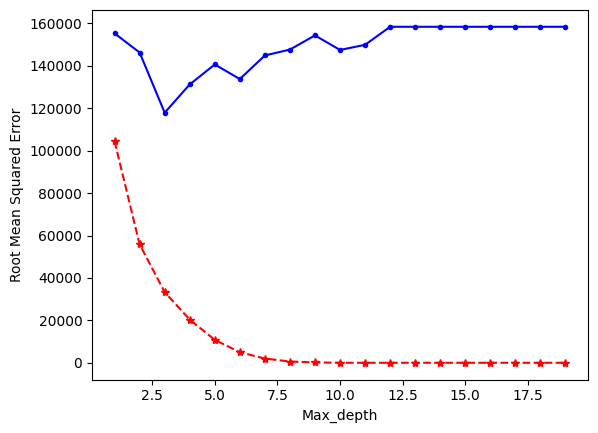

In [138]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)

for i in tree_size: #para cada profundidad i 
    # TODO: Train the needed tree with the set depth, then measure its RMSE in train and test and store them in the previous lists
    
    #árbol particular para esa profundidad 
    regresor = DecisionTreeRegressor(max_depth=i, random_state=0) 
    regresor.fit(x_train, y_train)
    
    y_entren_pred = regresor.predict(x_train)
    y_test_pred  = regresor.predict(x_test)
    
    rmse_entren = mean_squared_error(y_train, y_entren_pred)
    rmse_test  = mean_squared_error(y_test,  y_test_pred)
    
    #añadimos error a la lista
    train_rmse.append(rmse_entren)
    test_rmse.append(rmse_test)
    
# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')


> Question: What do you see here? What depth value would you select?

En el caso particular de los regresore que he constrido se ve claramente que la profundidad óptima es pequeña (3 como mucho 4). Esto significa que profundidades grandes hacen modelos con sobreajuste (mayor error como vemos en la gráfica)


Since we are not really making CV, we do not have multiple values for the train and test RMSE for each tree. Therefore, we *do not* have errorbars in the previous plot. That should raise some suspicions from your part. 

> Question: What happens if we change the `random_state` value? Are the previous results robust?

To answer the previous question you can try out code in the next cell. Feel free to try whatever you think is needed here.

In [139]:
# TODO: Your code here!
random_states = [0, 25, 50, 75, 100]
rmse_dic = {'test': []}

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=state)
    regressor = DecisionTreeRegressor(random_state=state)
    regressor.fit(X_train, y_train)
    train_rmse = sqrt(mean_squared_error(y_train, regressor.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    rmse_dic['test'].append(test_rmse)

print("error rmse de test: ", rmse_dic['test'])

print("cambiar la semilla provoca diferentes errores de prueba rmse porque cada vez el modelo está aprendiendo con un conjunto de datos distinto y con una estructura de árbol diferente.")
print("Los resultados son moderadamente robustos, con una variabilidad de hasta alrededor 100 de rmse (Desviación estandard moderada no baja pero no muy alta)")

error rmse de test:  [398.03934880192327, 370.2633167796285, 424.9173721369339, 473.5963975740698, 398.1744338141129]
cambiar la semilla provoca diferentes errores de prueba rmse porque cada vez el modelo está aprendiendo con un conjunto de datos distinto y con una estructura de árbol diferente.
Los resultados son moderadamente robustos, con una variabilidad de hasta alrededor 100 de rmse (Desviación estandard moderada no baja pero no muy alta)


In order to get more acquainted with the results, check out what happens if you include less  `x_train` features. To do so, change what you need from the previous block of code and put it in the next block here.
> Question: Do you see any important changes? How do you explain this?  

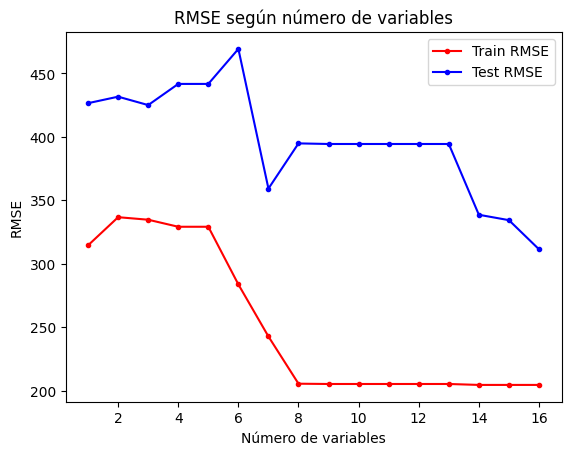

In [140]:
# TODO: Your code here!
# TODO: Your code here!
num_features_range = range(1, X.shape[1] + 1)
train_rmse = []
test_rmse = []

num_features_range = np.arange(1, X_train.shape[1] + 1)

for num_features in num_features_range:
    subconjunto_X_train = X_train.iloc[:, :num_features]
    subconjunto_X_test = X_test.iloc[:, :num_features]

    regresor = DecisionTreeRegressor(max_depth=3, random_state=1) #elegimos el depth optimo de amtes
    regresor.fit(subconjunto_X_train, y_train)

    train_pred = regresor.predict(subconjunto_X_train)
    test_pred = regresor.predict(subconjunto_X_test)
    
    train_rmse.append(sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse.append(sqrt(mean_squared_error(y_test, test_pred)))


plt.plot(num_features_range, train_rmse, 'r.-', label='Train RMSE')
plt.plot(num_features_range, test_rmse, 'b.-', label='Test RMSE')
plt.xlabel('Número de variables')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE según número de variables')
plt.show()

## Classification Tree

In order to complete this practical exercises with trees, we will also try out some classification trees to later do ensembles. Let us see how this works. 

First, load the `Carseat.csv` dataset from `data` (make sure to remove the NAs, as before)

In [141]:
# Load the dataset (remove the NAs)
carseats = pd.read_csv('../data/Carseat.csv').dropna() 
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Make it so that we have a new binary variable called `high`. This variable should be `1` when `sales` are over 8, and `0` otherwise.

In [142]:
carseats['high'] = (carseats['Sales'] > 8).astype(int) #astype convierte true en 1 y false en 0 

Convert the remaining variables to make them usable here

The variables `ShelveLoc`, `Urban` and `US` need to be converted to categorical variables to be correctly used. To that end, I suggest you use `pd.factorize` (although feel free to do as you will here...)

In [143]:
# TODO: Your code here!
#pd.factorize() asigna un número entero a cada categoría de la columna, el coger [0] nos quedamos con el numero que le asignamos
carseats['ShelveLoc'] = pd.factorize(carseats['ShelveLoc'])[0]
carseats['Urban'] = pd.factorize(carseats['Urban'])[0]
carseats['US'] = pd.factorize(carseats['US'])[0]

Now, we will employ all variables to predict the `high` value (except `Sales` and `high`, for obvious reasons). Note that we have essentially converted a _regression_ problem into a _binary classification_ one.

In [144]:
X =  carseats.drop(columns=['Sales', 'high']) # TODO: Drop the unwanted columns
y =  carseats['high'] # TODO:  Select the "high" column

# TODO: Performn the train/test split with again 50% data for train and 50% for test 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.5, random_state = 0)

Construct a decision tree classifier. To control for the depth, we will fix it to a *maximum depth of 6*. Use as impurity criteria the **Gini index**.

In [145]:
carseats_classifier = DecisionTreeClassifier(max_depth=6, random_state=0)  # TODO: Fill the NAs. Fix the random_state to 0

# Train the model with .fit
carseats_classifier.fit(X_train, y_train) # TODO

DecisionTreeClassifier(max_depth=6, random_state=0)

Plot the tree (again, reuse whatever you may need here)

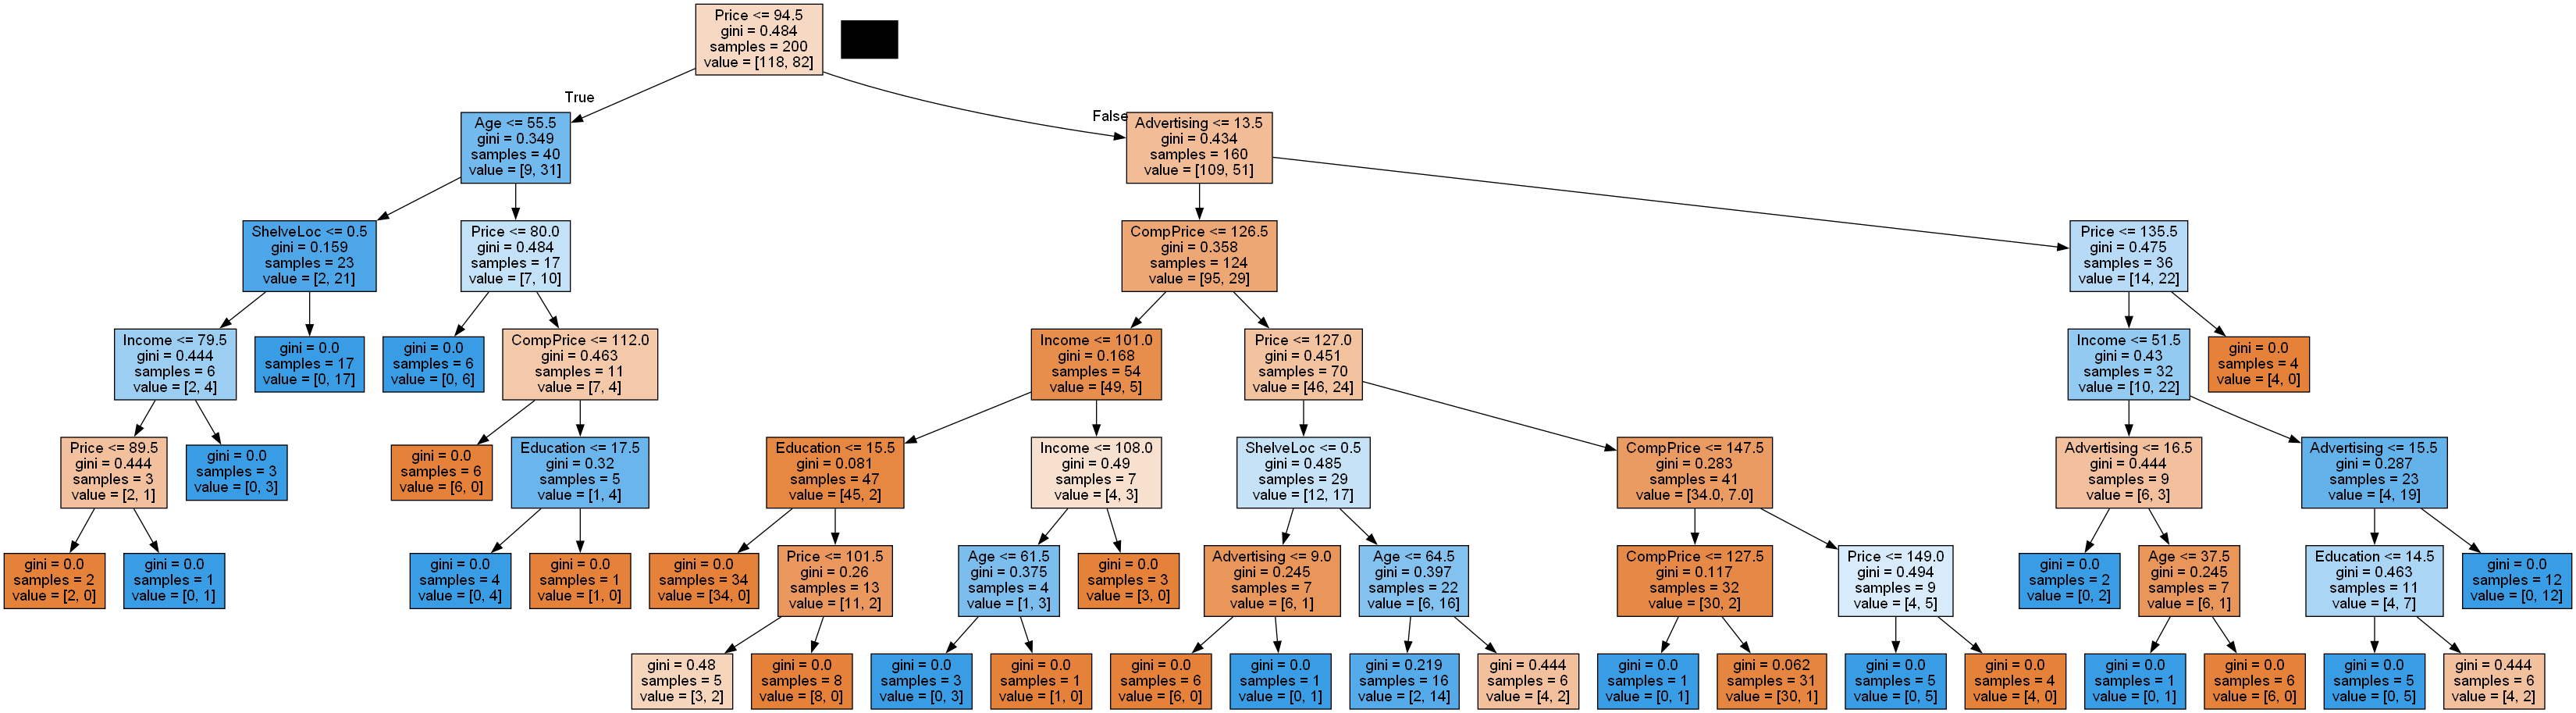

In [146]:
# TODO: Your code here!
dot_data = StringIO()
export_graphviz(carseats_classifier, 
                out_file=dot_data, 
                feature_names=X_train.columns, 
                filled=True, 
                class_names=None)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Let us now assess the quality of the tree. To that end, **represent the confusion matrix** for the test data

In [147]:
# TODO: Your code here!
prediccion = carseats_classifier.predict(X_test)
matriz_de_confusion = confusion_matrix(y_test, prediccion)
matriz_de_confusion 
"""devuleve: TP FP
             FN TN """

'devuleve: TP FP\n             FN TN '

> Questions: 
> * What is the **precision** of this tree?
> * Do you consider the dataset balanced?

PRECISION = TP/ (TP + FP) =  101/(101 +17) = 0,86
Los datos estarán balanceado si tienen un número parecido de positivos y negativos. Podemos observar que hay una mayor cantidad de TP comparado con los TN, esto indica que esta desmbalanceado hacia la clase postiva.

# Ensembles

Now we will try out some of the ensemble methods from class. Remember there is an stochastic component embedded in these for the most part, so we may not recover exactly the same results twice depending on how you implement things.

## Bagging

The decision tree models mentioned above usually suffers from high variance. **B**ootstrap **agg**regation, or **bagging** usually helps with this issue. To do bagging here, we will do it both by hand and by employing the sklearn function.

First, let's go with the *by-hand* implementation

In [148]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample

#(usamos 80% de los datos)

# Store the predictions
predictions = []

for _ in range(n_estimators):

    # Create a bootstrap sample
    #muestreamos permitiendo reemplazo 
    sample_indices = np.random.choice(range(X_train.shape[0]), size=int(max_samples * X_train.shape[0]), replace=True)# TODO
    X_bootstrap = X_train.iloc[sample_indices] # TODO 
    y_bootstrap = y_train.iloc[sample_indices] # TODO 
    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree =  DecisionTreeClassifier()# TODO (impose no restrictions whatsoever)
    decision_tree.fit(X_bootstrap, y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)# TODO: Obtain the predictions for X_test
    predictions.append(y_pred)

# Combine predictions
# For classification, you can use majority voting
#usamos la moda = mayoria para elergir el que más árboles han elegido (bagging)
majority_vote = mode(np.array(predictions), axis=0)[0] # TODO: Obtain the majority vote for each instance

# For regression, you can use averaging
# combined_predictions = np.(predictions, axis=0)  # For classification, use np.mean for voting

majority_vote #imprimos el array donde decimos que predecimos para cada dato del array del test (0 o 1)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0])

Print the confusion matrix

In [ ]:
# TODO: Your code here! Use majority_vote and y_test
matriz_de_confusion = confusion_matrix(y_test, prediccion)
matriz_de_confusion

array([[101,  17],
       [ 32,  50]])

Let's see how this is done in `sklearn`... Fit it and show the confusion matrix

In [150]:
bagging = BaggingClassifier(random_state=0 )# TODO: Create a BaggingClassifier (fix random_state to 0)

# TODO: Train it with the training data
bagging.fit(X_train, y_train)

# TODO: Obtain the predictions
bagging_pred = bagging.predict(X_test)

# TODO: Print the confusion matrix (use the confusion_matrix function)
matriz_de_confusion = confusion_matrix(y_test, bagging_pred)
matriz_de_confusion

array([[97, 21],
       [28, 54]])

We will use the `sklearn` implementation to study the variable importance. *Make sure you understand how this is done!*

<Axes: >

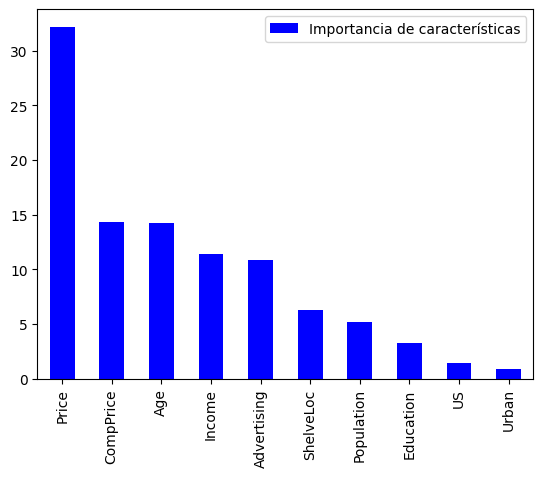

In [154]:
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
#Calculamos la importancia promedio de las características de todos los árboles del modelo Bagging 
#es decir para cada arbol hemos sacado al importancia de cada caract con feature_importances_ y luego hemos hecho media de esto

#multiplicamos por 100 para expresar como % 
bagging_featureImportance = pd.DataFrame({'Importancia de características': feature_importances *100},index = X.columns)

#ploteamos ordenado
bagging_featureImportance.sort_values('Importancia de características', ascending=False).plot(kind='bar', color='blue')

> Question: What do you see here?
Claramente la característica más importante es el precio según el modelo, además otras características importantes son el CompPrice y Age, es decor los regresores que más ayudan a dterminar si las ventas son altas o no

## Random Forest

We will also do this in the RF case. First, we will implement it by hand. Feel free to use the previous code and modify it as you may see fit to do RF here!

In [ ]:

# RF parameters
n_estimators = 10  # Number of decision trees in the forest
max_features = 0.8  # Proportion of features to consider for each split

# Train decision trees with random feature selection and make predictions
predictions = []
for _ in range(n_estimators):

    # TODO: Construct your own RF ensemble! Reuse the Bagging code and change whatever you may need here
    
    #empzamos igual que en bagging 
    sample_indices = np.random.choice(range(X_train.shape[0]), size=int(X_train.shape[0]), replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices]

    #hacemos lo mismo pero con los regresores 
    features_indices = np.random.choice(range(X_train.shape[1]), size=int(max_features * X_train.shape[1]), replace=False)
    X_bootstrap = X_bootstrap.iloc[:, features_indices]

    # lo entrenamos 
    decision_tree = DecisionTreeClassifier(random_state=np.random.randint(10000))
    decision_tree.fit(X_bootstrap, y_bootstrap)

    # Make predictions on the test set using the trained decision tree
    X_test_subset = X_test.iloc[:, features_indices]  
    y_pred = decision_tree.predict(X_test_subset)
    predictions.append(y_pred)


# TODO: Finally, combine predictions using majority voting
majority_vote = mode(np.array(predictions), axis=0)[0] # TODO

Print the confusion matrix

In [156]:
# TODO: Your code here!
matriz_de_confusion = confusion_matrix(y_test, prediccion)
matriz_de_confusion

array([[101,  17],
       [ 32,  50]])

Let us do it again with `sklearn` so you see the differences... Show the confusion matrix. In this last part there may be some differences with your run, which are due to the randomness of the classifiers constructed. Do not worry too much about it here.

In [157]:
# TODO: Construct the RF classifier with RandomForestClassifier. Fix the random_state to 0, n_estimators to 10 and max_features to 0.8
rf = RandomForestClassifier(n_estimators=10, max_features=0.8, random_state=0) # TODO

# TODO: Train it
rf.fit(X_train, y_train)

# TODO: Predict the test values
rf_pred= rf.predict(X_test)

# TODO: Obtain the confusion matrix and print it
cm = confusion_matrix(y_test, rf_pred)
print('Matriz de confusión:\n', cm)

Matriz de confusión:
 [[103  15]
 [ 34  48]]


Using again the `sklearn` implementation, we will study the feature importance

<Axes: >

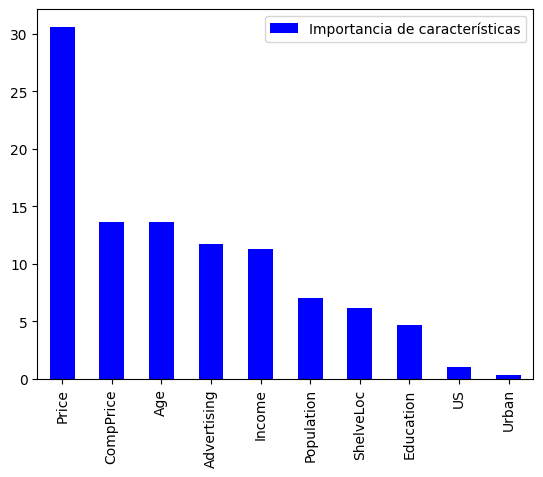

In [159]:
feature_importances = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)
#Calculamos la importancia promedio de las características de todos los árboles del modelo Bagging 
#es decir para cada arbol hemos sacado al importancia de cada caract con feature_importances_ y luego hemos hecho media de esto

#multiplicamos por 100 para expresar como % 
bagging_featureImportance = pd.DataFrame({'Importancia de características': feature_importances *100},index = X.columns)

#ploteamos ordenado
bagging_featureImportance.sort_values('Importancia de características', ascending=False).plot(kind='bar', color='blue')

> Question: Given the models thus far (simple tree, bagging and RF), which one would you choose and why?

Random Forest es una version mejorada de Bagging porque evita tener problemas con variables correlacionadas, por eso en general lo lógico es elegir Random Forest. Aun así viendo que los resultados son parecidos, y que Bagging es menos costoso comptuacionalmente porque evitamos el boostrsap de los regresores, podría ser buena idea elegir Bagging.

## Extra: Boosting

In order to fully complete our review of the ensemble methods from class, we are missing the **Boosting method**. In order to keep matters simple, we will implement it here with `sklearn` so that you get to see what it looks like...

In [ ]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

# Create the Boosting model
gb= GradientBoostingClassifier(n_estimators = 5000, random_state = 1, max_depth = 2)
gb.fit(X_train, y_train)

# If you want to try it out, you can change reuse most of previous codes to run it here!

The results are pretty good! Keep in mind that this is achieved with super weak learners s.a. trees with depth 2. It is quite fast, and super easy to use with `sklearn`. We can also study the variable importance in this case.

<Axes: >

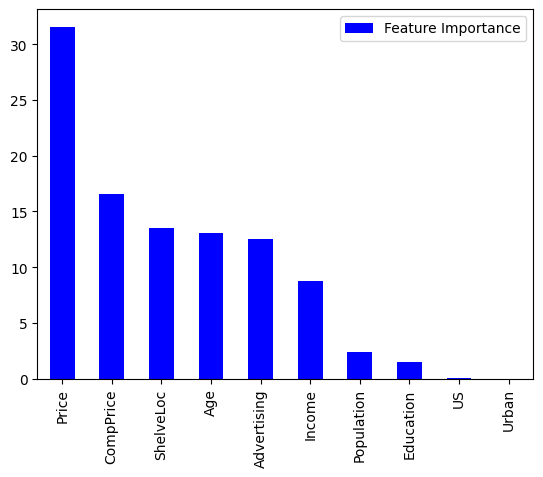

In [164]:
feature_importances = gb.feature_importances_
gb_featureimportance= pd.DataFrame({'Feature Importance': gb.feature_importances_*100}, index= X.columns)
gb_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='blue')

If you want to see how this can be implemented easily by hand, you can use the following code. We are using an implementation that follows a description of Boosting mode similar to the one given in the ISLR book

In [ ]:
#Initialize the parameters
n_estimators = 1000  # Number of decision trees in the ensemble
learning_rate = 0.1  # Learning rate for each decision tree

# Initialize the weights for the training samples
sample_weights = np.ones(len(X_train)) / len(X_train)

# Train decision trees with weighted samples and make predictions
predictions = []
for _ in range(n_estimators):

    # Train a decision tree classifier on the weighted training samples
    decision_tree = DecisionTreeClassifier(max_depth = 2)
    decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

    # Calculate error
    incorrect = (y_pred != y_test).astype(int)
    error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

    # Update sample weights
    alpha = learning_rate * np.log((1 - error) / error)
    sample_weights *= np.exp(alpha * incorrect)

# Combine predictions
# For classification, you can use weighted voting
combined_predictions = np.zeros(len(X_test))
for prediction in predictions:
    combined_predictions += prediction

# Evaluate the performance of the boosting ensemble
# TODO: This can be done with the previous codes you had already. Reuse them here to see the result!

final_predictions = np.where(combined_predictions > 0, 1, 0)

matriz_de_confusion = confusion_matrix(y_test, final_predictions)
print('Boosting ensemble accuracy:', matriz_de_confusion)

Boosting ensemble accuracy: [[102  16]
 [ 46  36]]
